In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ponto de coleta dos dados históricos: PINH04900

In [40]:
df_2012_2017 = pd.read_excel('PINH04900_2012_2017.xlsx', decimal=",")
df_2017_2022 = pd.read_excel('PINH04900_2017_2022.xlsx', decimal=",")

In [41]:
df_2012_2022 = pd.concat([df_2012_2017, df_2017_2022])
df_2012_2022.head()

,Período DE,Período ATE,Cod_Interaguas,Tipo Rede,UGRHI,Código Ponto,Status Ponto,Data Coleta,Hora Coleta,Parametro,...,CLASSE,Município,UF,Inicio Operação,Fim Operação,Latitude,Longitude,Altitude,Localização,Captação
0,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,12/11/2012,15:40,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
1,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,21/01/2013,12:49,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
2,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,18/03/2013,12:45,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
3,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,06/05/2013,14:40,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
4,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,15/07/2013,09:52,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N


In [42]:
df_2012_2022['datetime'] = pd.to_datetime(df_2012_2022['Data Coleta'] + ' ' + df_2012_2022['Hora Coleta'])
df_2012_2022['datetime']

0      2012-12-11 15:40:00
1      2013-01-21 12:49:00
2      2013-03-18 12:45:00
3      2013-06-05 14:40:00
4      2013-07-15 09:52:00
               ...        
1651   2022-06-10 10:05:00
1652   2022-06-10 10:05:00
1653   2022-06-10 10:05:00
1654   2022-06-10 10:05:00
1655   2022-06-10 10:05:00
Name: datetime, Length: 3007, dtype: datetime64[ns]

In [43]:
df_2012_2022 = df_2012_2022.sort_values(by='datetime')

In [44]:
df_2012_2022_ph = df_2012_2022.loc[df_2012_2022['Parametro'] == 'pH']
df_2012_2022_coliformes = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Escherichia coli**']
df_2012_2022_dbo = df_2012_2022.loc[df_2012_2022['Parametro'] == 'DBO (5, 20)']
df_2012_2022_fosforo = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Fósforo Total']
df_2012_2022_nitrogenio = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Nitrogênio Kjeldahl']
df_2012_2022_oxigenio = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Oxigênio Dissolvido']
df_2012_2022_solidos = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Sólido Total']
df_2012_2022_temperatura_agua = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Temperatura da Água']
df_2012_2022_temperatura_ar = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Temperatura do Ar']
df_2012_2022_turbidez = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Turbidez']

In [45]:
#Fator de correção para coliformes em água

df_2012_2022_coliformes['Valor'] = df_2012_2022_coliformes['Valor'].astype(float)
df_2012_2022_coliformes['Valor'] = df_2012_2022_coliformes['Valor'].div(80)

C:\Users\felip\AppData\Local\Temp\ipykernel_25456\2880924698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012_2022_coliformes['Valor'] = df_2012_2022_coliformes['Valor'].astype(float)
C:\Users\felip\AppData\Local\Temp\ipykernel_25456\2880924698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012_2022_coliformes['Valor'] = df_2012_2022_coliformes['Valor'].div(80)


In [46]:
variacao_temperatura = []
for n in range(0, len(df_2012_2022_temperatura_agua)):
    variacao_temperatura.append(float(df_2012_2022_temperatura_agua.iloc[n]['Valor']) - float(df_2012_2022_temperatura_ar.iloc[n]['Valor']))

In [47]:
from matplotlib import dates as mdates

def plot_historic(title, datetimes, y, datetimes_label, y_label):
    fig, ax = plt.subplots(figsize=(20,7))
    plt.title(title)
    plt.xlabel(datetimes_label)
    plt.ylabel(y_label)
    plt.plot(datetimes, y, '--o')
    for year in range(2012, 2023):
        plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='-', alpha=0.2)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.set_xticks(ax.get_xticks()[::3])
    plt.xticks(rotation=60)
    plt.show()

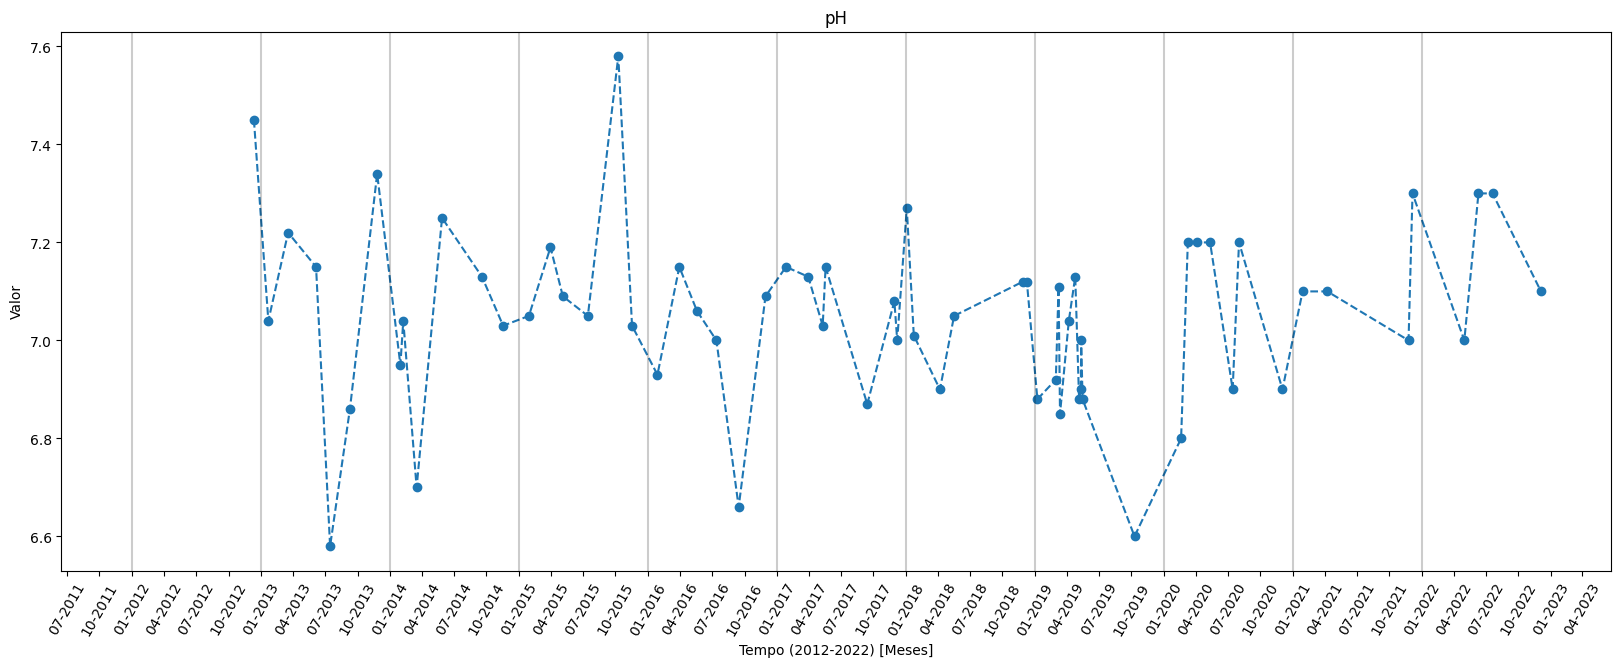

In [48]:
plot_historic('pH', df_2012_2022_ph['datetime'], df_2012_2022_ph['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Valor')

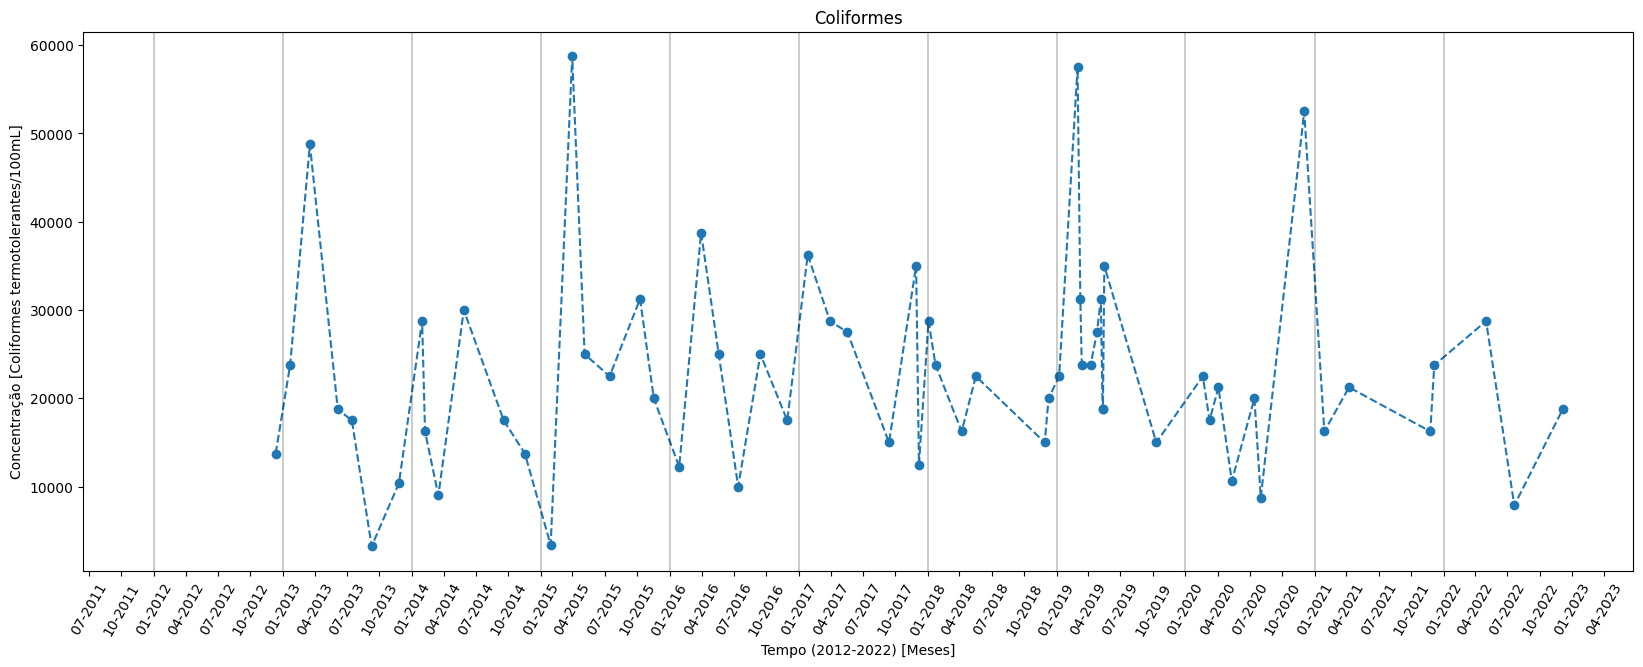

In [49]:
plot_historic('Coliformes', df_2012_2022_coliformes['datetime'], df_2012_2022_coliformes['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [Coliformes termotolerantes/100mL]')

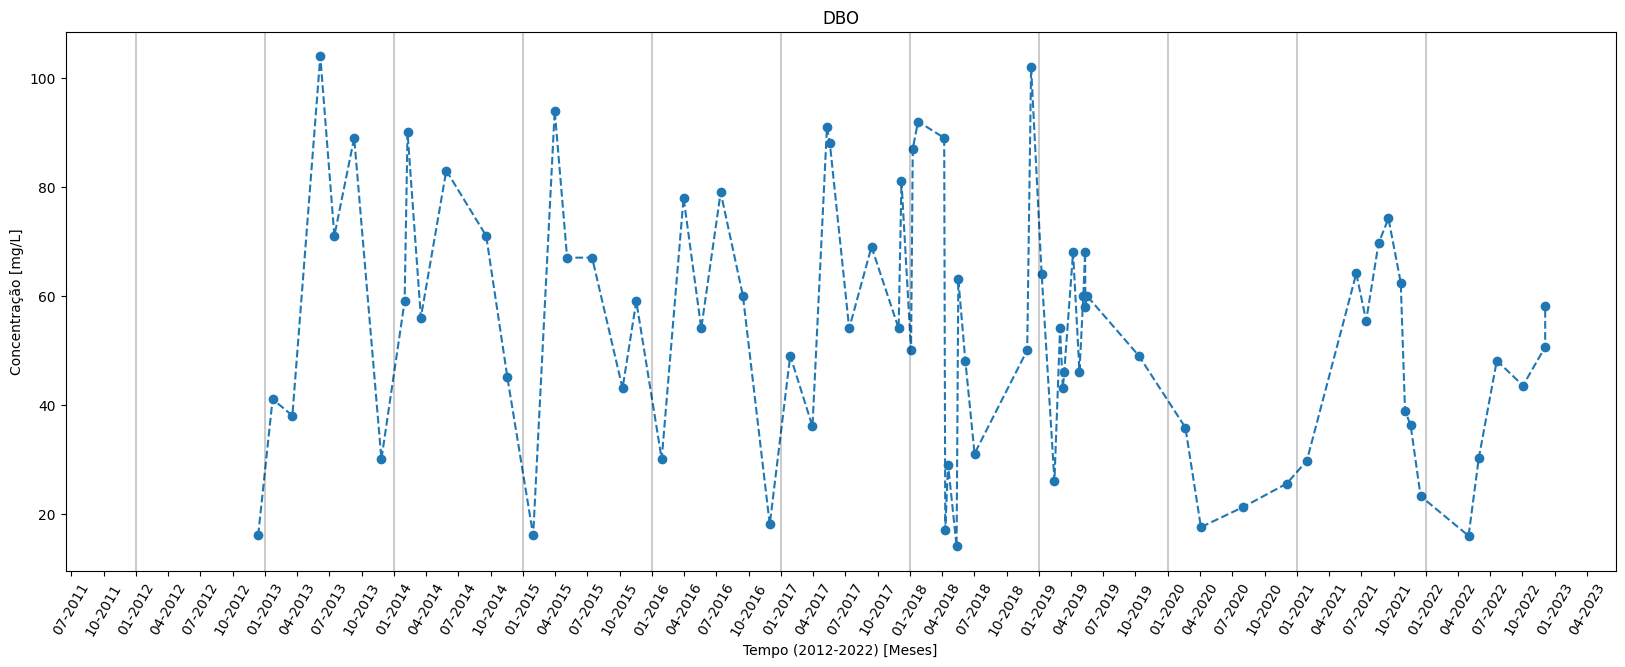

In [50]:
plot_historic('DBO', df_2012_2022_dbo['datetime'], df_2012_2022_dbo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

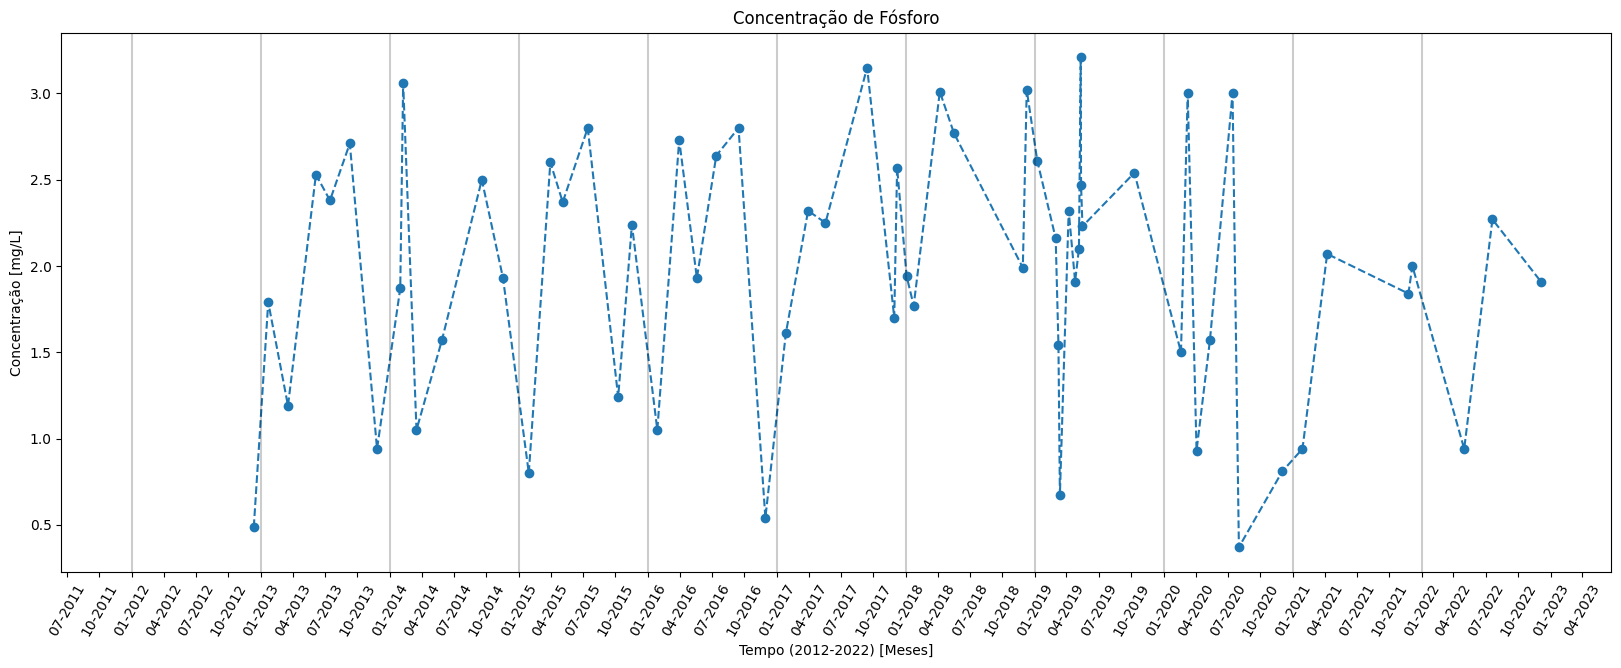

In [51]:
plot_historic('Concentração de Fósforo', df_2012_2022_fosforo['datetime'], df_2012_2022_fosforo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

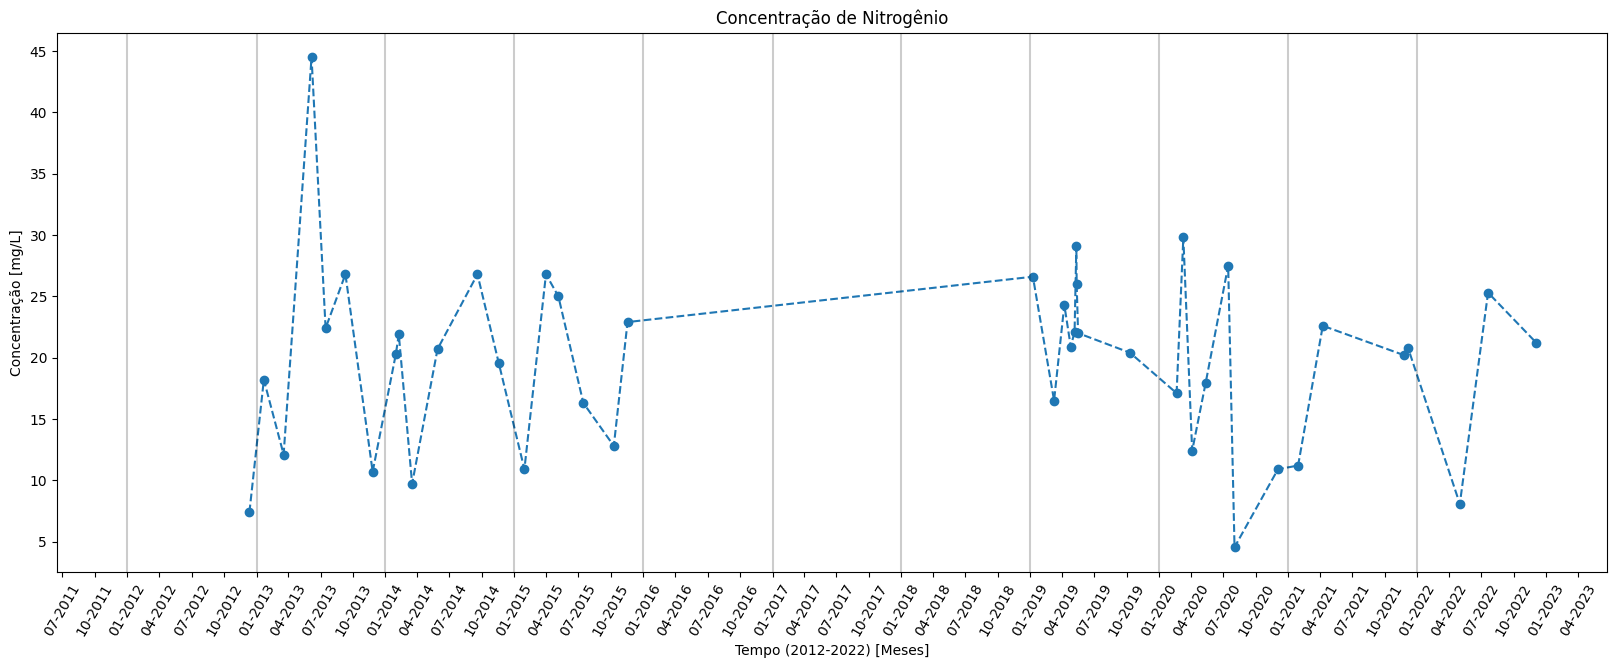

In [52]:
plot_historic('Concentração de Nitrogênio', df_2012_2022_nitrogenio['datetime'], df_2012_2022_nitrogenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

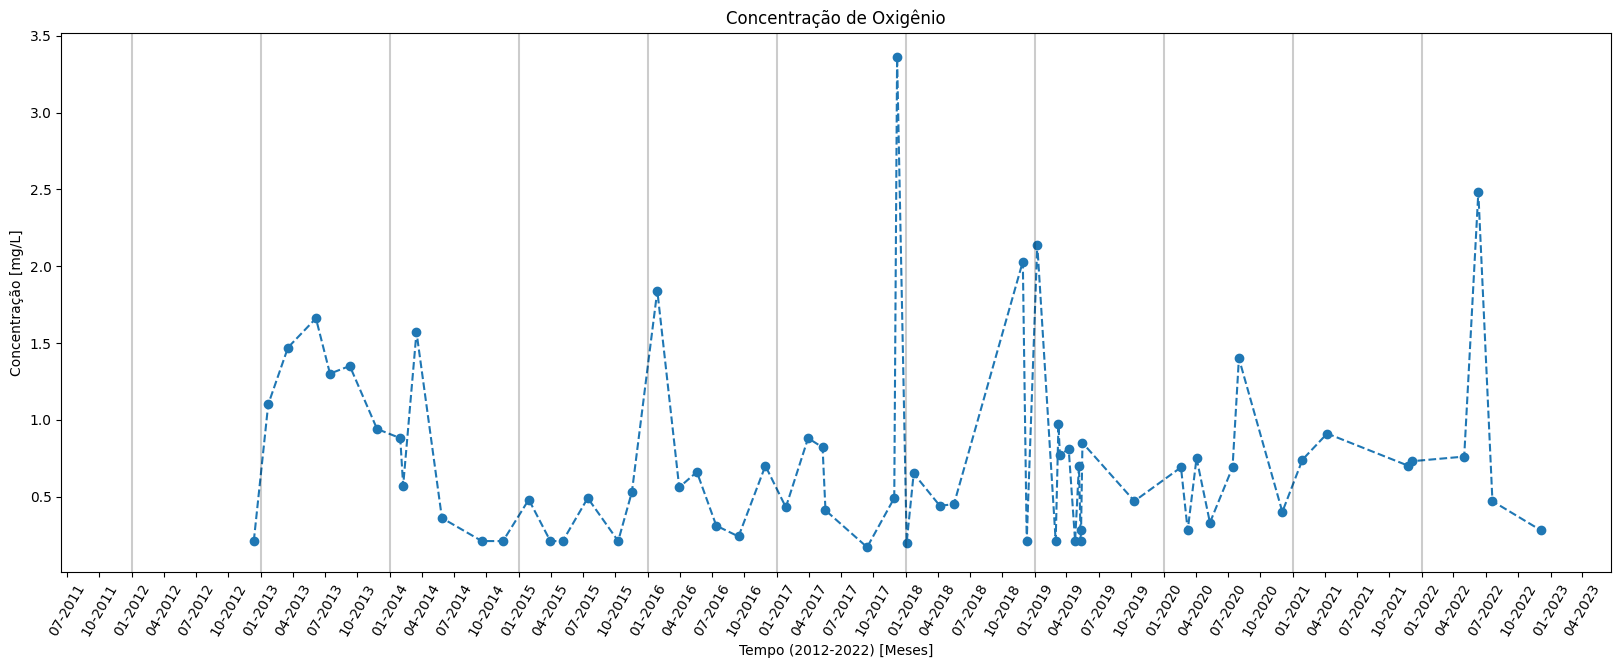

In [53]:
plot_historic('Concentração de Oxigênio', df_2012_2022_oxigenio['datetime'], df_2012_2022_oxigenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

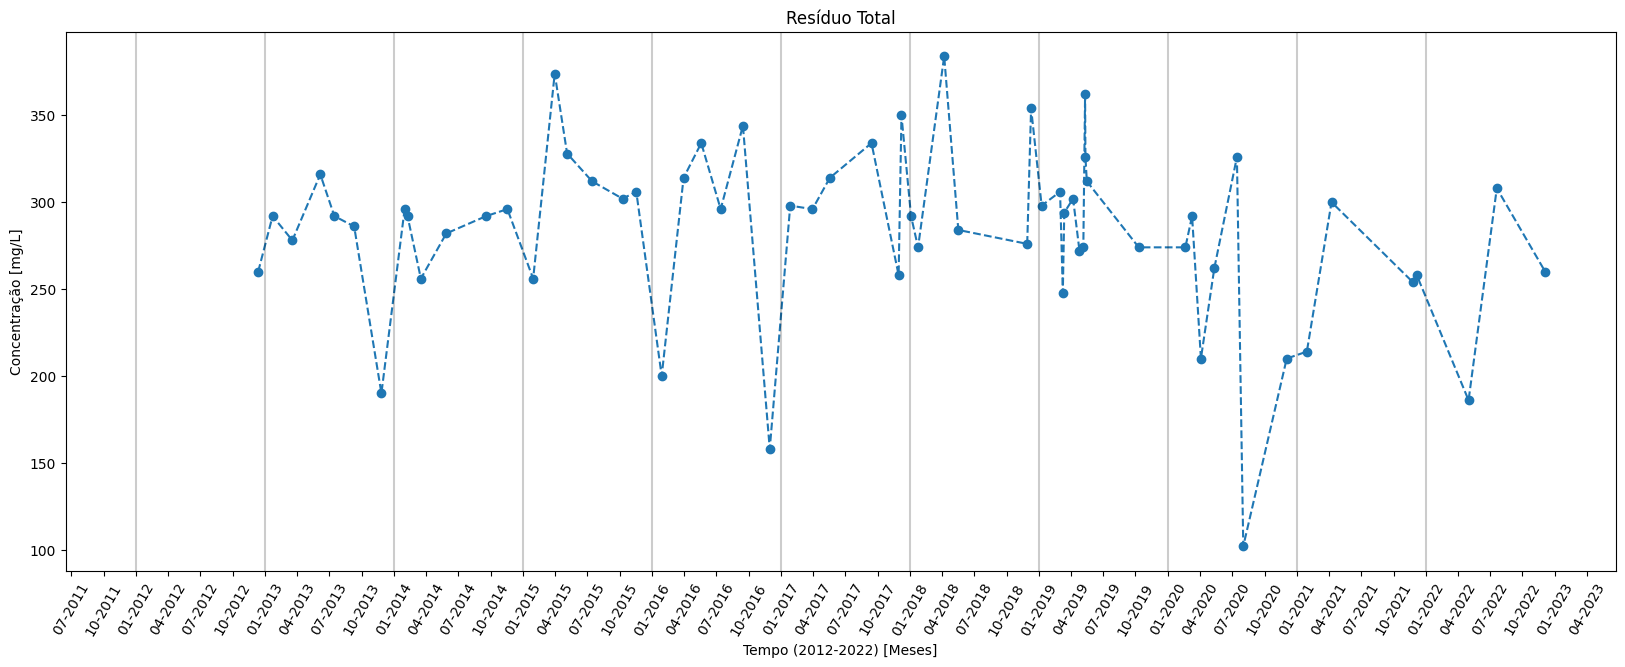

In [54]:
plot_historic('Resíduo Total', df_2012_2022_solidos['datetime'], df_2012_2022_solidos['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

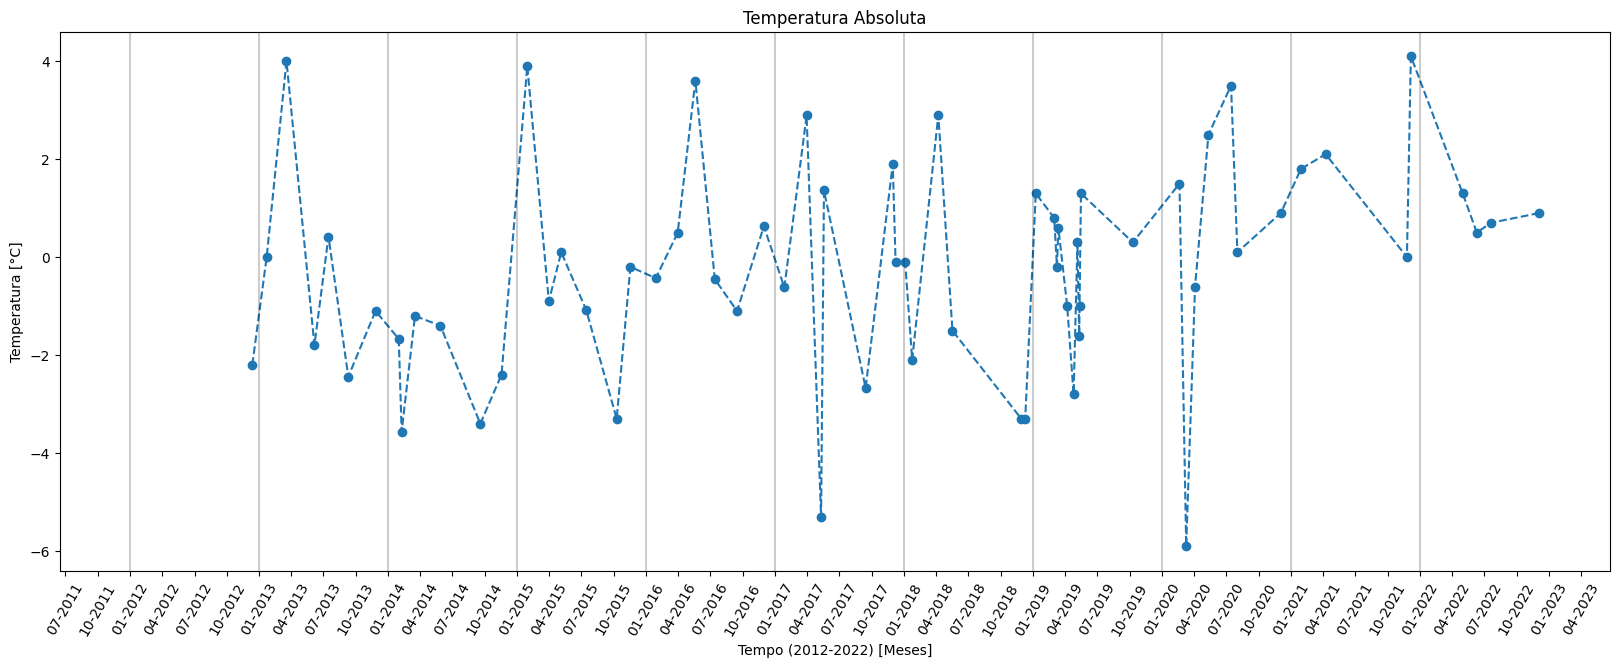

In [55]:
plot_historic('Temperatura Absoluta', df_2012_2022_temperatura_agua['datetime'], variacao_temperatura, 'Tempo (2012-2022) [Meses]', 'Temperatura [°C]')

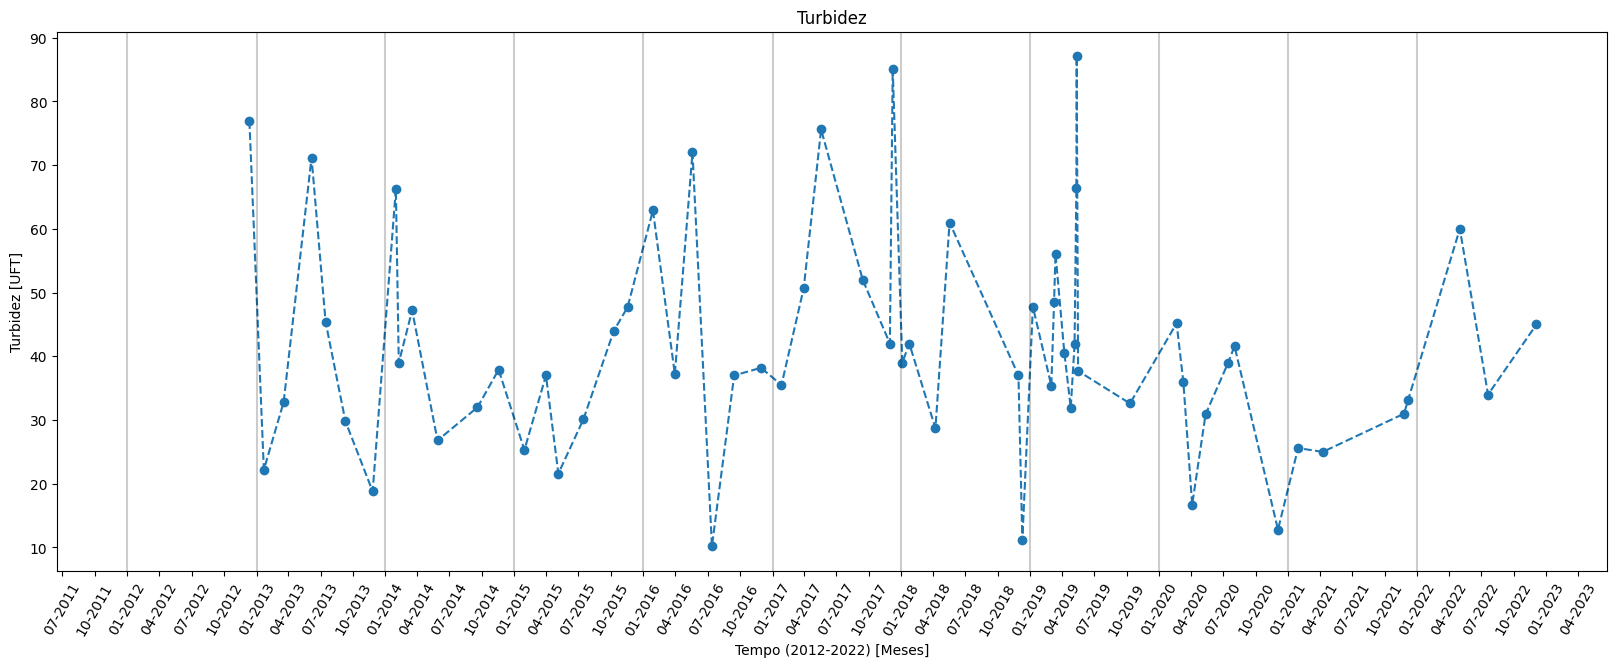

In [56]:
plot_historic('Turbidez', df_2012_2022_turbidez['datetime'], df_2012_2022_turbidez['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Turbidez [UFT]')

In [57]:
#Padrões da resolução CONAMA 357/2005

limites_ph = {'classe 1': [6.0, 9.0], 'classe 2': [6.0, 9.0], 'classe 3': [6.0, 9.0], 'classe 4': [6.0, 9.0]}
limites_coliformes = {'classe 1': [0, 200], 'classe 2': [0, 1000], 'classe 3': [0, 4000], 'classe 4': [0, 9999999]}
limites_dbo = {'classe 1': [0, 3], 'classe 2': [0, 5], 'classe 3': [0, 10], 'classe 4': [0, 9999999]}
limites_fosforo = {'classe 1': [0, 0.1], 'classe 2': [0, 0.1], 'classe 3': [0, 0.15], 'classe 4': [0, 9999999]}
limites_nitrogenio = {'classe 1': [0, 3.7], 'classe 2': [0, 3.7], 'classe 3': [0, 13.3], 'classe 4': [0, 9999999]}
limites_oxigenio = {'classe 1': [6, 9999999], 'classe 2': [5, 9999999], 'classe 3': [4, 9999999], 'classe 4': [2, 9999999]}
limites_residuo = {'classe 1': [0, 500], 'classe 2': [0, 500], 'classe 3': [0, 500], 'classe 4': [0, 9999999]}
limites_turbidez = {'classe 1': [0, 40], 'classe 2': [0, 100], 'classe 3': [0, 100], 'classe 4': [0, 9999999]}

In [58]:
def plot_historic_conama(title, datetimes, y, datetimes_label, y_label, limites, limites_grafico):
    fig, ax = plt.subplots(figsize=(20,7))
    plt.axhspan(-9999999, 9999999, facecolor='red', alpha=0.6, label='Classe 4/Inapropriado')
    #plt.axhspan(limites['classe 4'][0], limites['classe 4'][1], facecolor='darkorange', alpha=0.5, label='Classe 4')
    plt.axhspan(limites['classe 3'][0], limites['classe 3'][1], facecolor='yellow', alpha=0.4, label='Classe 3')
    plt.axhspan(limites['classe 2'][0], limites['classe 2'][1], facecolor='lime', alpha=0.3, label='Classe 2')
    plt.axhspan(limites['classe 1'][0], limites['classe 1'][1], facecolor='green', alpha=0.3, label='Classe 1')
    plt.title(title)
    plt.xlabel(datetimes_label)
    plt.ylabel(y_label)
    plt.plot(datetimes, y, '--o')
    for year in range(2012, 2023):
        plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='-', alpha=0.2)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.set_xticks(ax.get_xticks()[::3])
    ax.set_xlim(np.min(datetimes), np.max(datetimes))
    ax.set_ylim(limites_grafico[0], limites_grafico[1])
    plt.legend(loc='upper right')
    plt.xticks(rotation=60)
    plt.savefig(title + '.png', dpi=1200, bbox_inches='tight')
    plt.show()

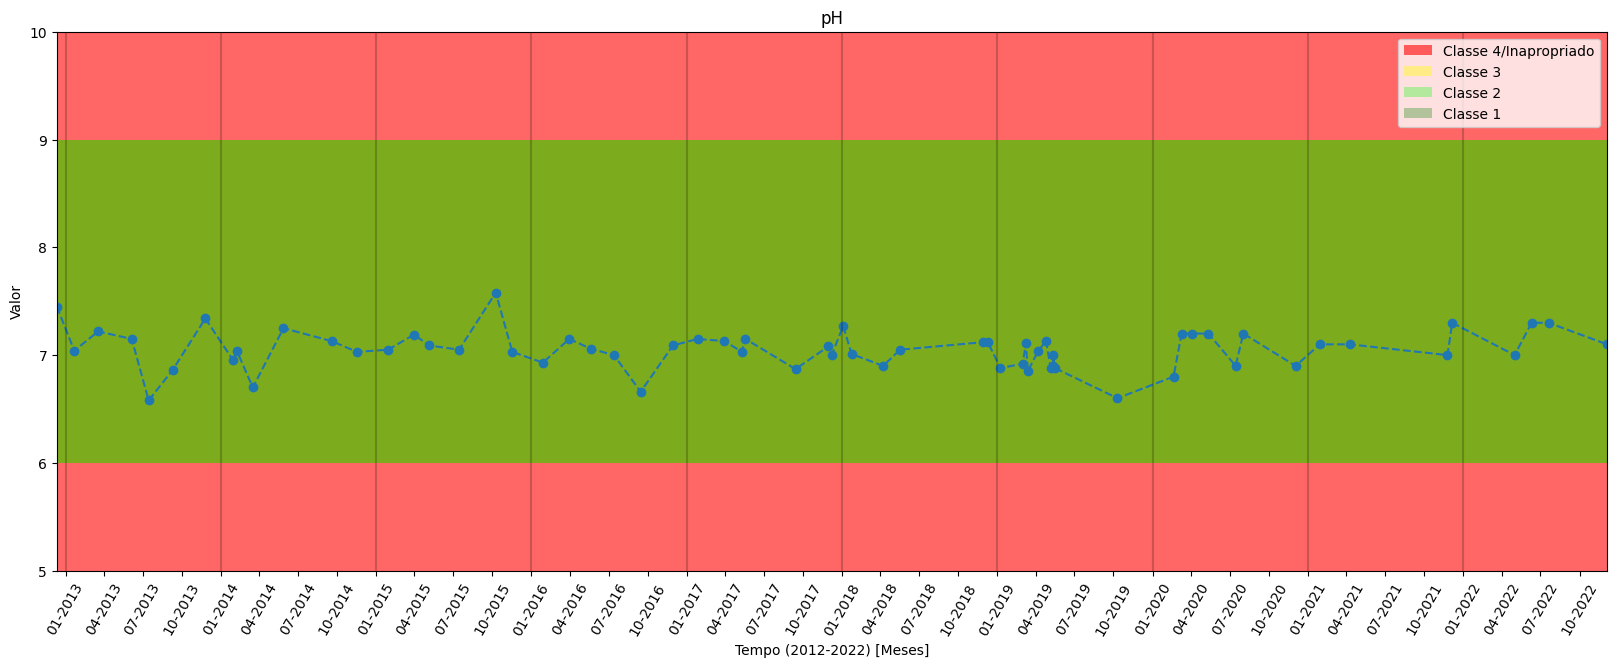

In [59]:
plot_historic_conama('pH', df_2012_2022_ph['datetime'], df_2012_2022_ph['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Valor', limites_ph, [5, 10])

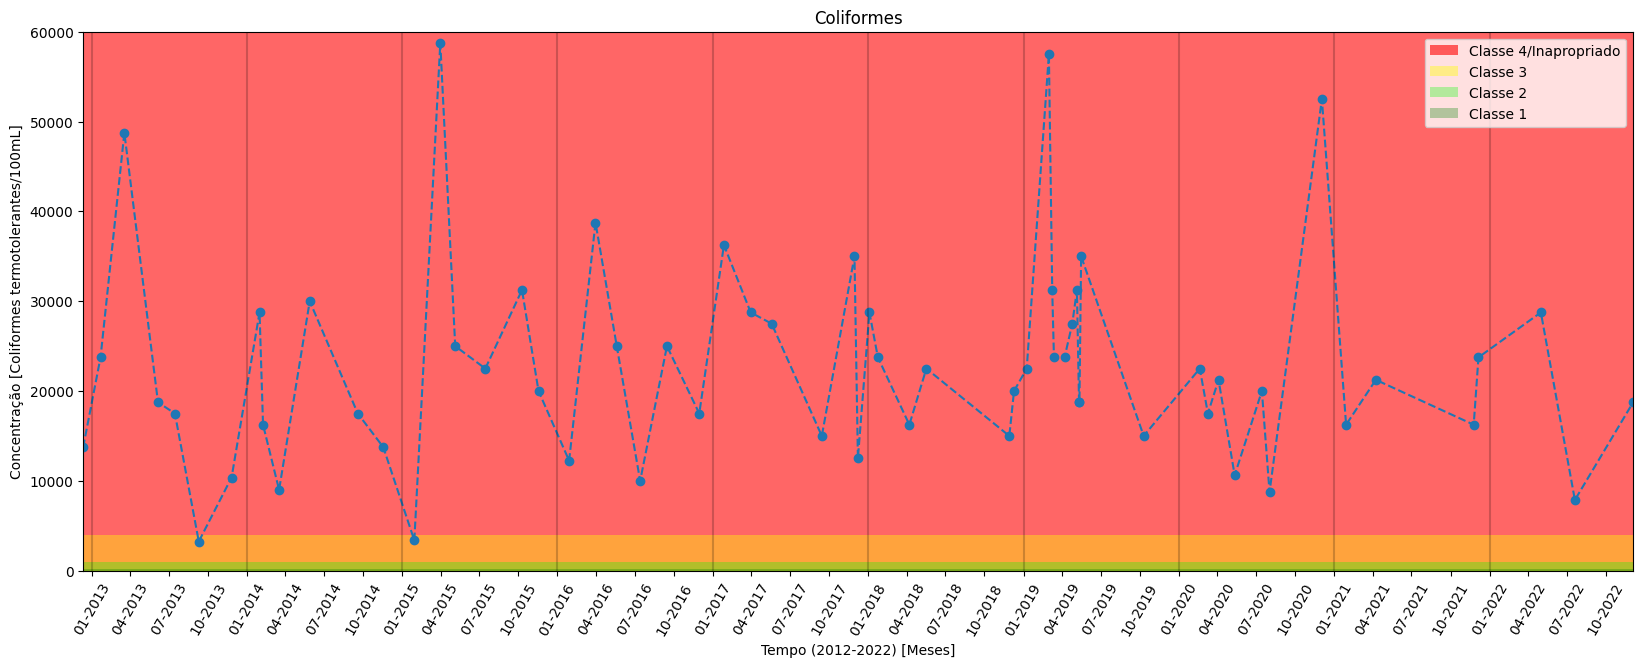

In [60]:
plot_historic_conama('Coliformes', df_2012_2022_coliformes['datetime'], df_2012_2022_coliformes['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [Coliformes termotolerantes/100mL]', limites_coliformes, [0, 60000])

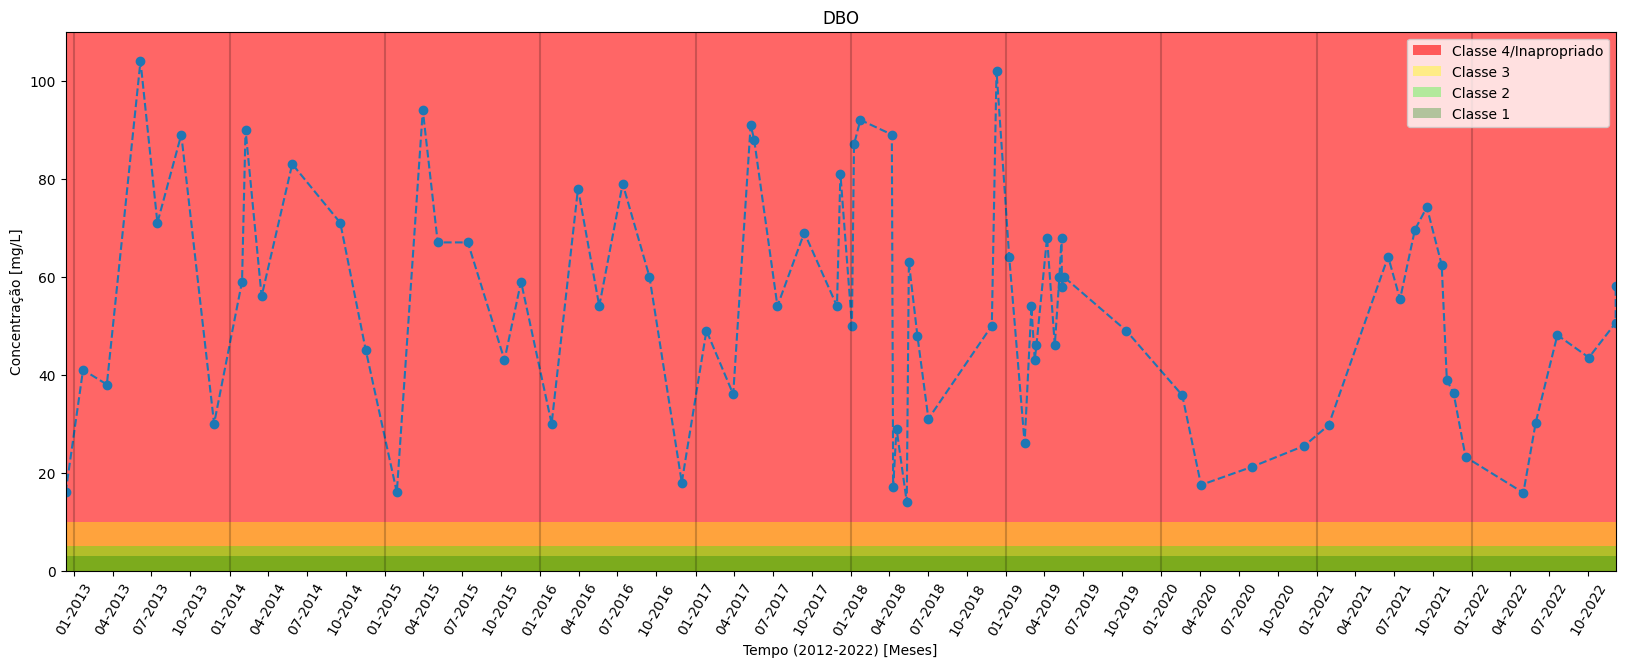

In [61]:
plot_historic_conama('DBO', df_2012_2022_dbo['datetime'], df_2012_2022_dbo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', limites_dbo, [0, 110])

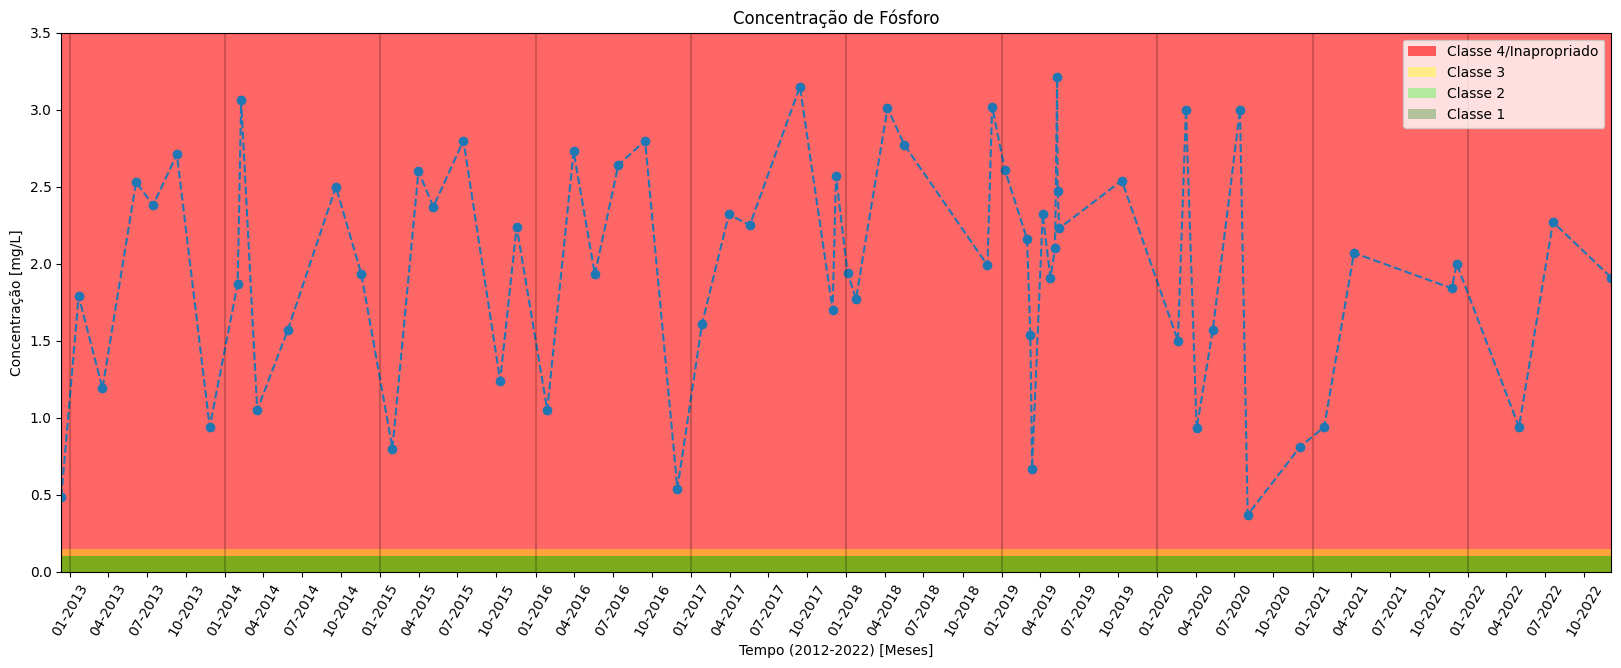

In [62]:
plot_historic_conama('Concentração de Fósforo', df_2012_2022_fosforo['datetime'], df_2012_2022_fosforo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', limites_fosforo, [0, 3.5])

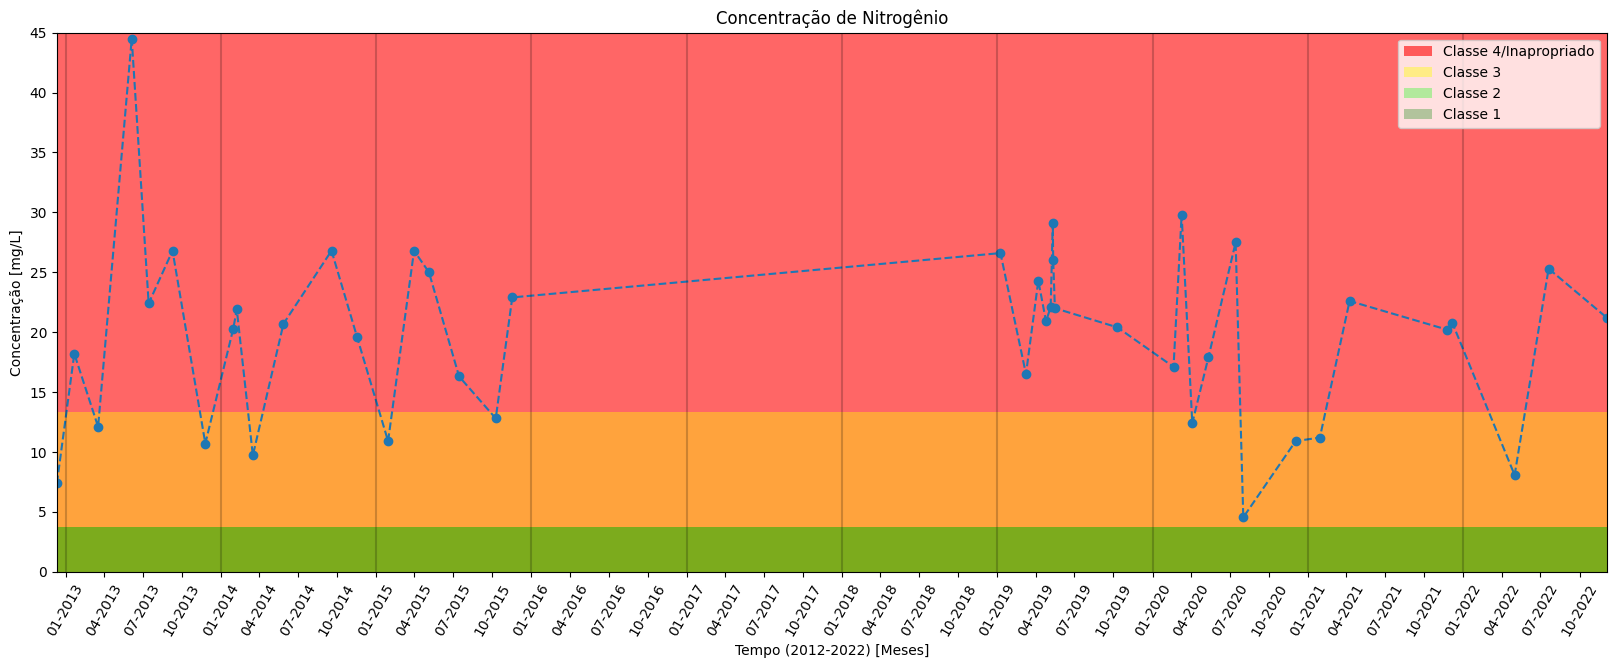

In [63]:
plot_historic_conama('Concentração de Nitrogênio', df_2012_2022_nitrogenio['datetime'], df_2012_2022_nitrogenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', limites_nitrogenio, [0, 45])

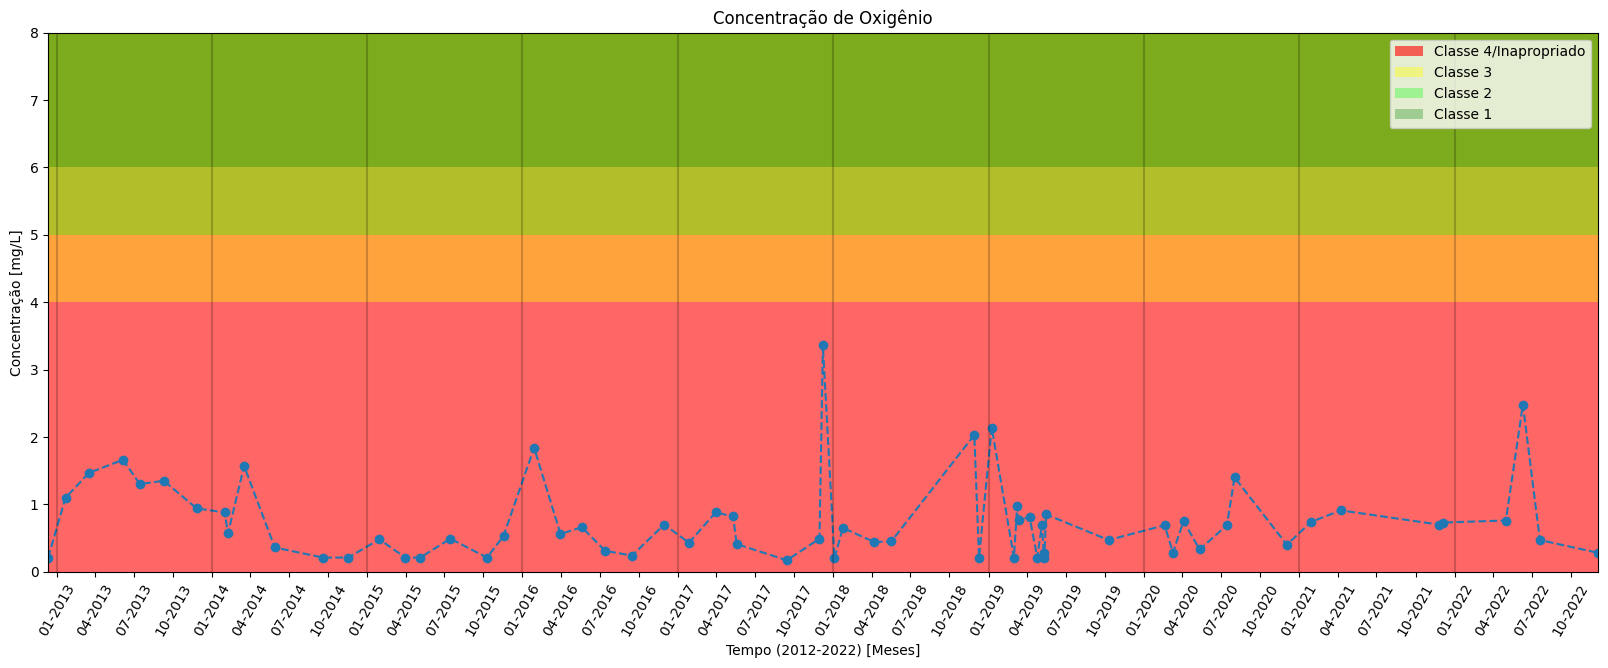

In [64]:
plot_historic_conama('Concentração de Oxigênio', df_2012_2022_oxigenio['datetime'], df_2012_2022_oxigenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', limites_oxigenio, [0, 8])

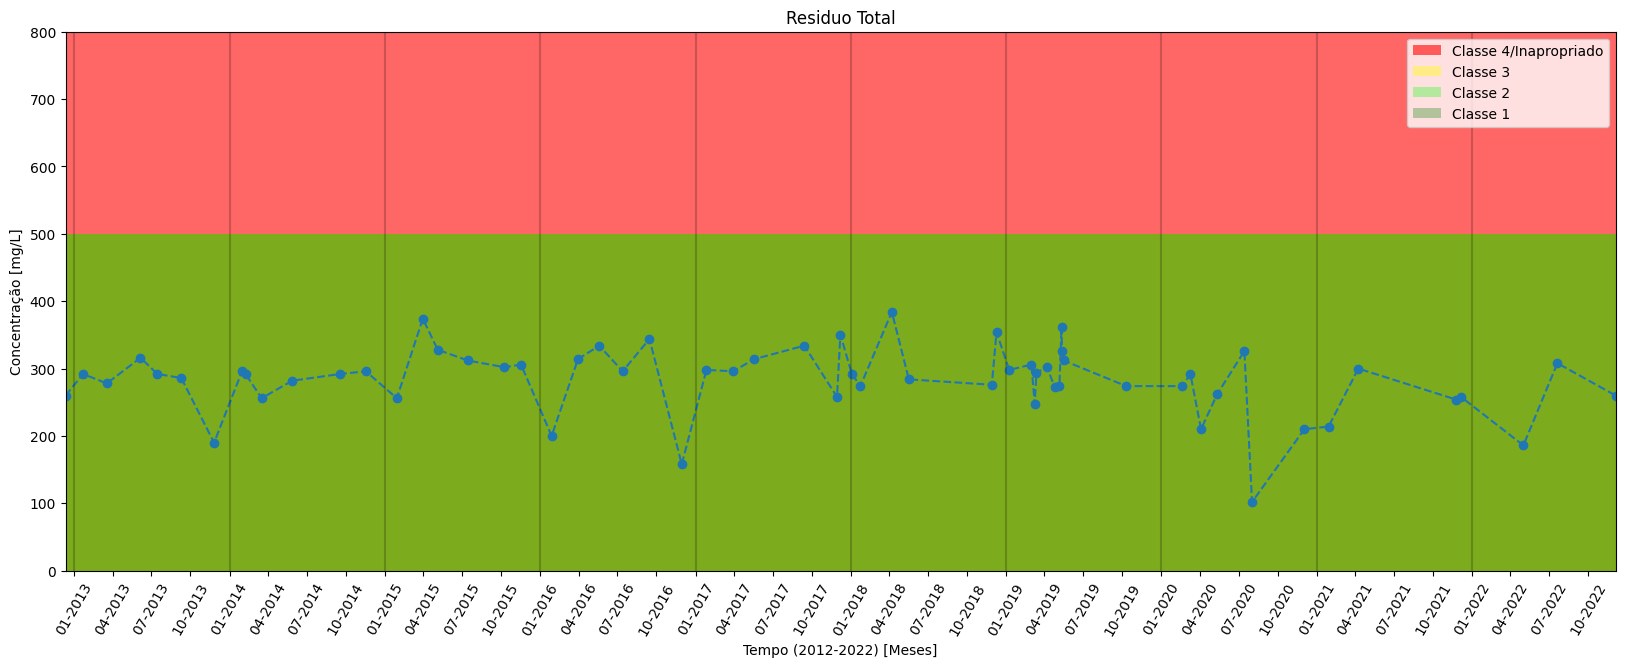

In [65]:
plot_historic_conama('Residuo Total', df_2012_2022_solidos['datetime'], df_2012_2022_solidos['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', limites_residuo, [0, 800])

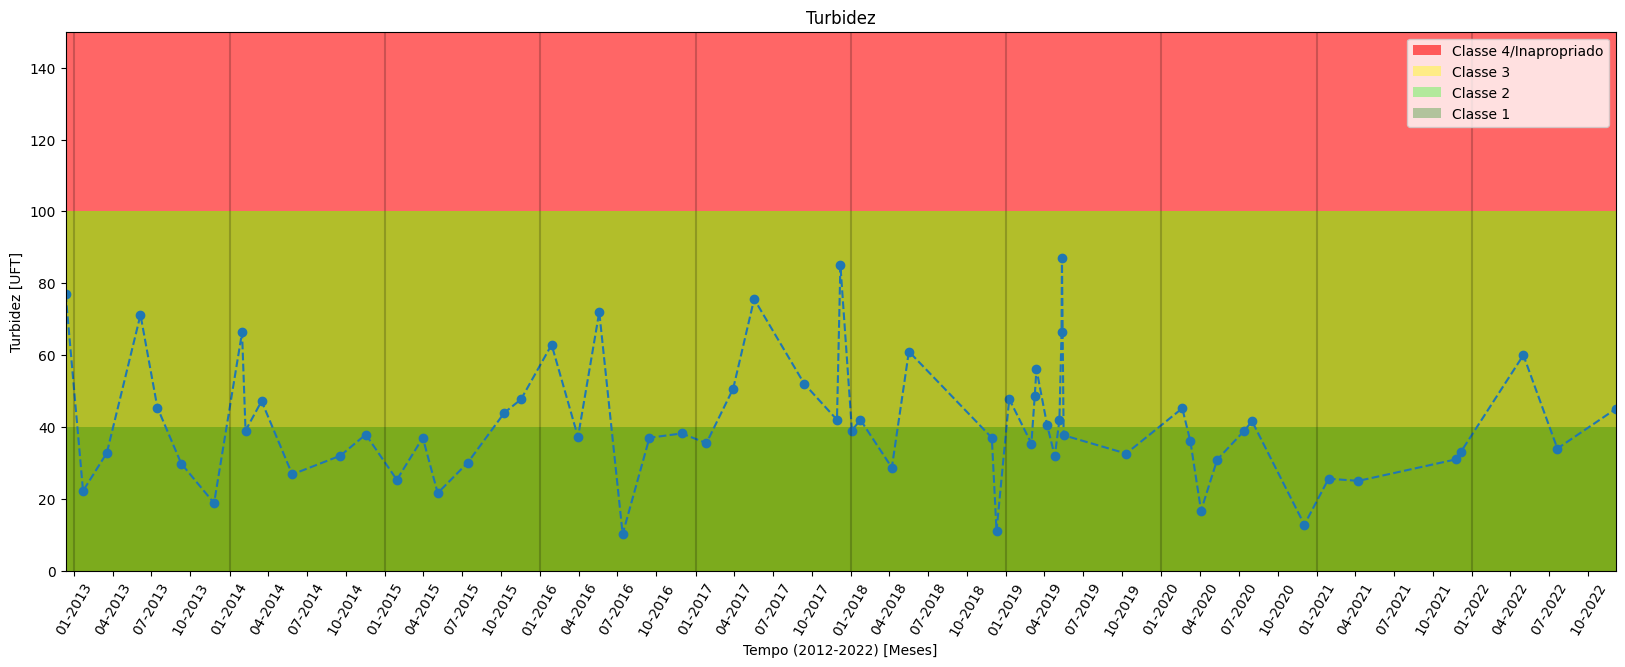

In [66]:
plot_historic_conama('Turbidez', df_2012_2022_turbidez['datetime'], df_2012_2022_turbidez['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Turbidez [UFT]', limites_turbidez, [0, 150])

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def fit_polynomial_plot(title, datetimes, y, datetimes_label, y_label, limites_grafico):
    fig, ax = plt.subplots(figsize=(20,7))
    plt.title(title)
    plt.xlabel(datetimes_label)
    plt.ylabel(y_label)
    poly_reg = PolynomialFeatures(degree=10)
    X = np.linspace(0, len(y), len(y))
    X = X.reshape(-1, 1)
    Y = y.values.reshape(-1, 1)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, Y)
    plt.scatter(datetimes, y, color='blue', label='Dados')
    plt.plot(datetimes, pol_reg.predict(poly_reg.fit_transform(X)), color='red', linewidth=5, label='Tendência (polinômio de grau 10)')	
    for year in range(2012, 2023):
        plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='-', alpha=0.2)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.set_xticks(ax.get_xticks()[::3])
    ax.set_xlim(np.min(datetimes), np.max(datetimes))
    ax.set_ylim(limites_grafico[0], limites_grafico[1])
    plt.legend(loc='upper right')
    plt.xticks(rotation=60)
    plt.savefig(title + '.png', dpi=1200, bbox_inches='tight')
    plt.show()

In [68]:
df_2012_2022_ph['datetime']

1101   2012-12-11 15:40:00
1102   2013-01-21 12:49:00
1103   2013-03-18 12:45:00
1104   2013-06-05 14:40:00
1105   2013-07-15 09:52:00
               ...        
1094   2021-12-05 16:30:00
1472   2022-05-01 09:30:00
1652   2022-06-10 10:05:00
1474   2022-07-20 08:50:00
1473   2022-12-04 09:38:00
Name: datetime, Length: 64, dtype: datetime64[ns]

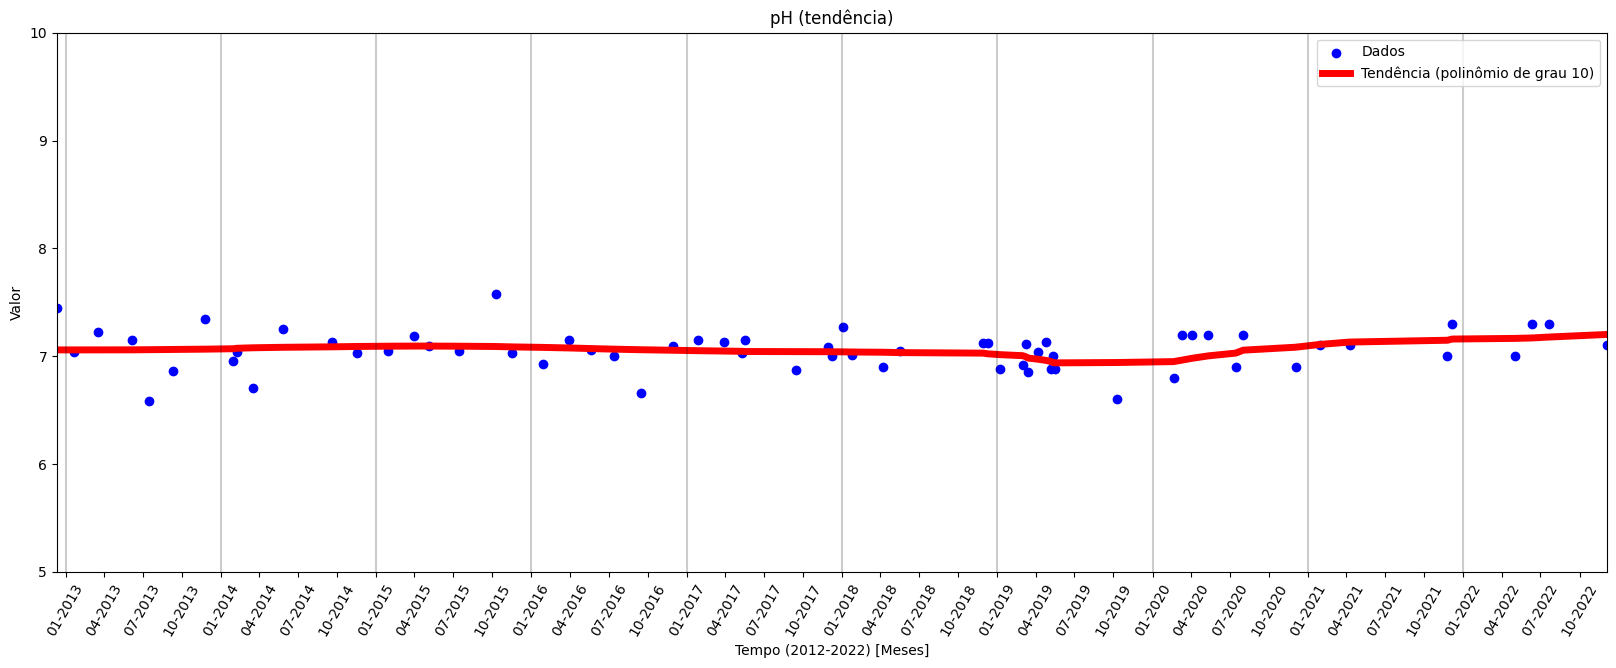

In [69]:
fit_polynomial_plot('pH (tendência)', df_2012_2022_ph['datetime'], df_2012_2022_ph['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Valor', [5, 10])

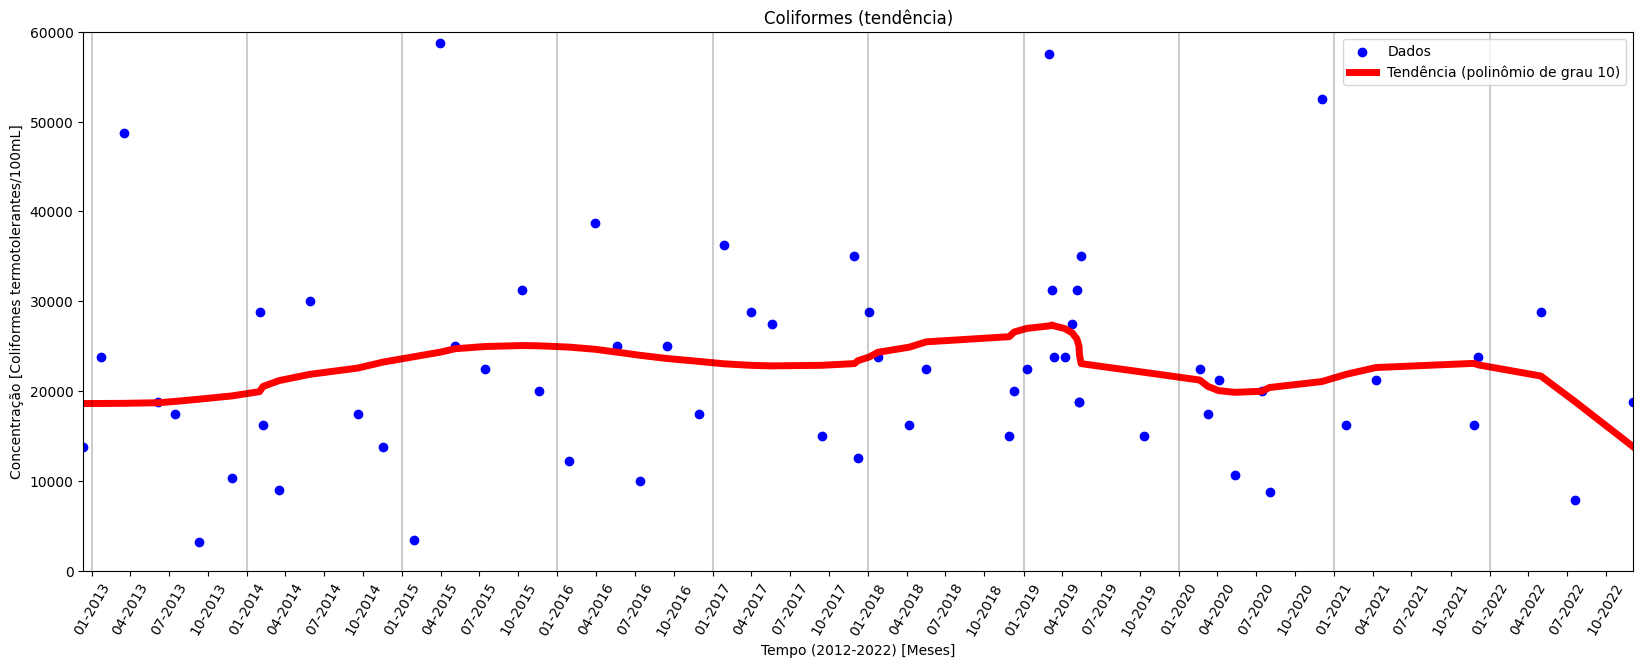

In [70]:
fit_polynomial_plot('Coliformes (tendência)', df_2012_2022_coliformes['datetime'], df_2012_2022_coliformes['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [Coliformes termotolerantes/100mL]', [0, 60000])

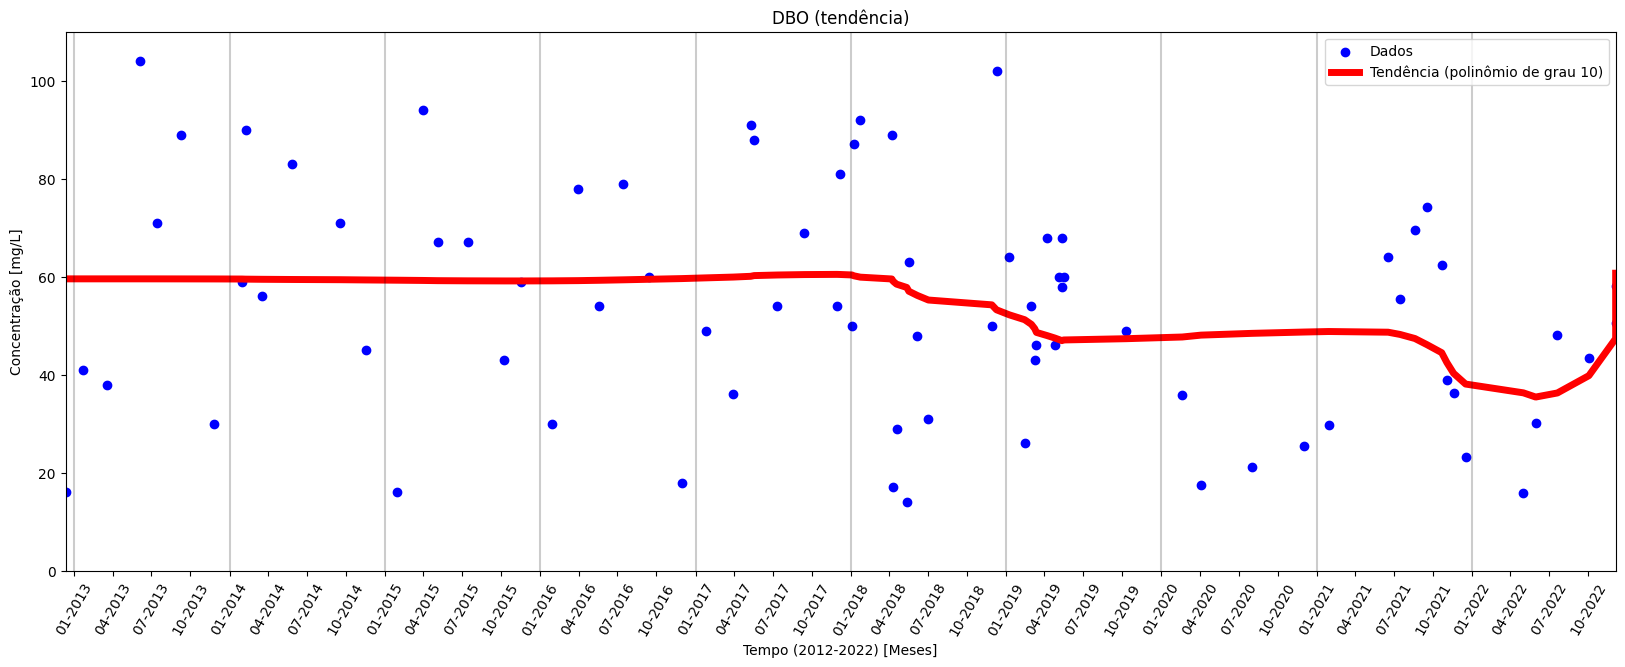

In [71]:
fit_polynomial_plot('DBO (tendência)', df_2012_2022_dbo['datetime'], df_2012_2022_dbo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', [0, 110])

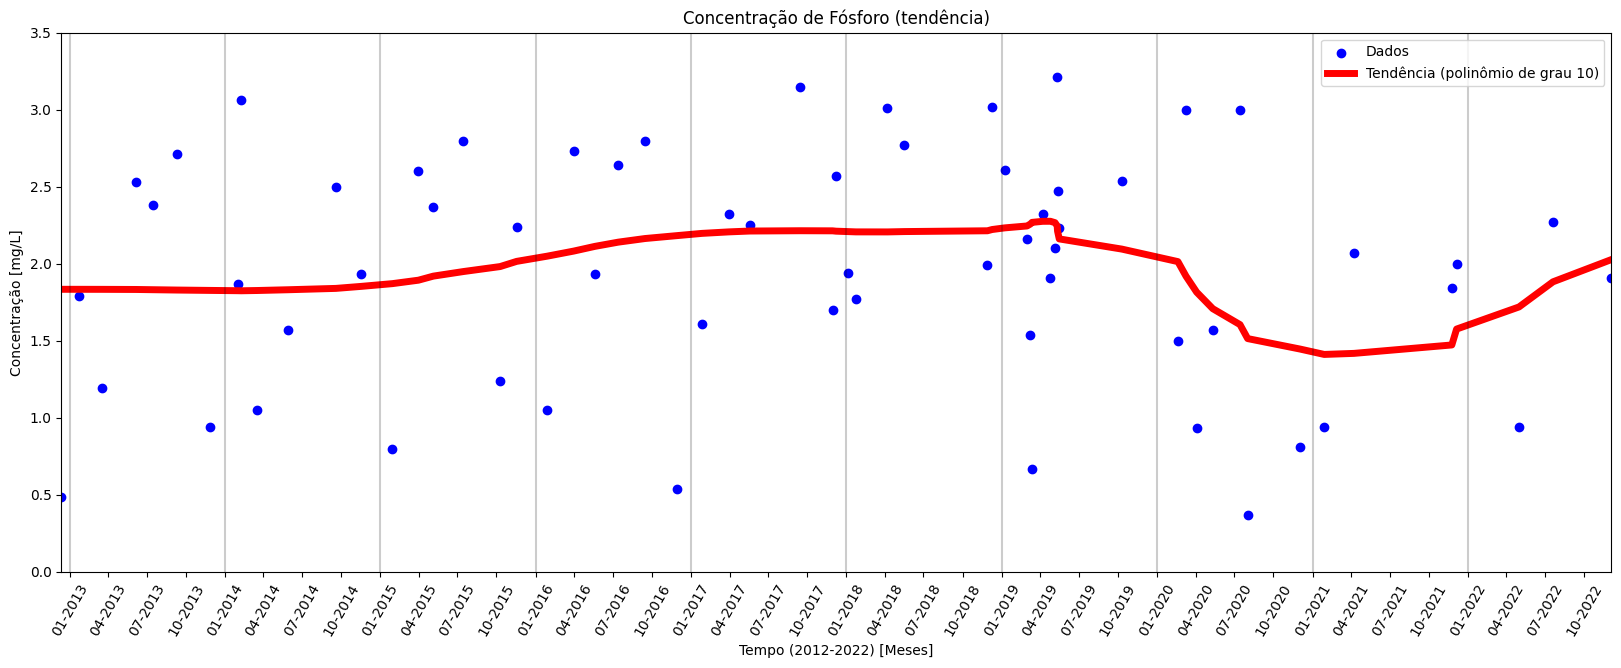

In [72]:
fit_polynomial_plot('Concentração de Fósforo (tendência)', df_2012_2022_fosforo['datetime'], df_2012_2022_fosforo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', [0, 3.5])

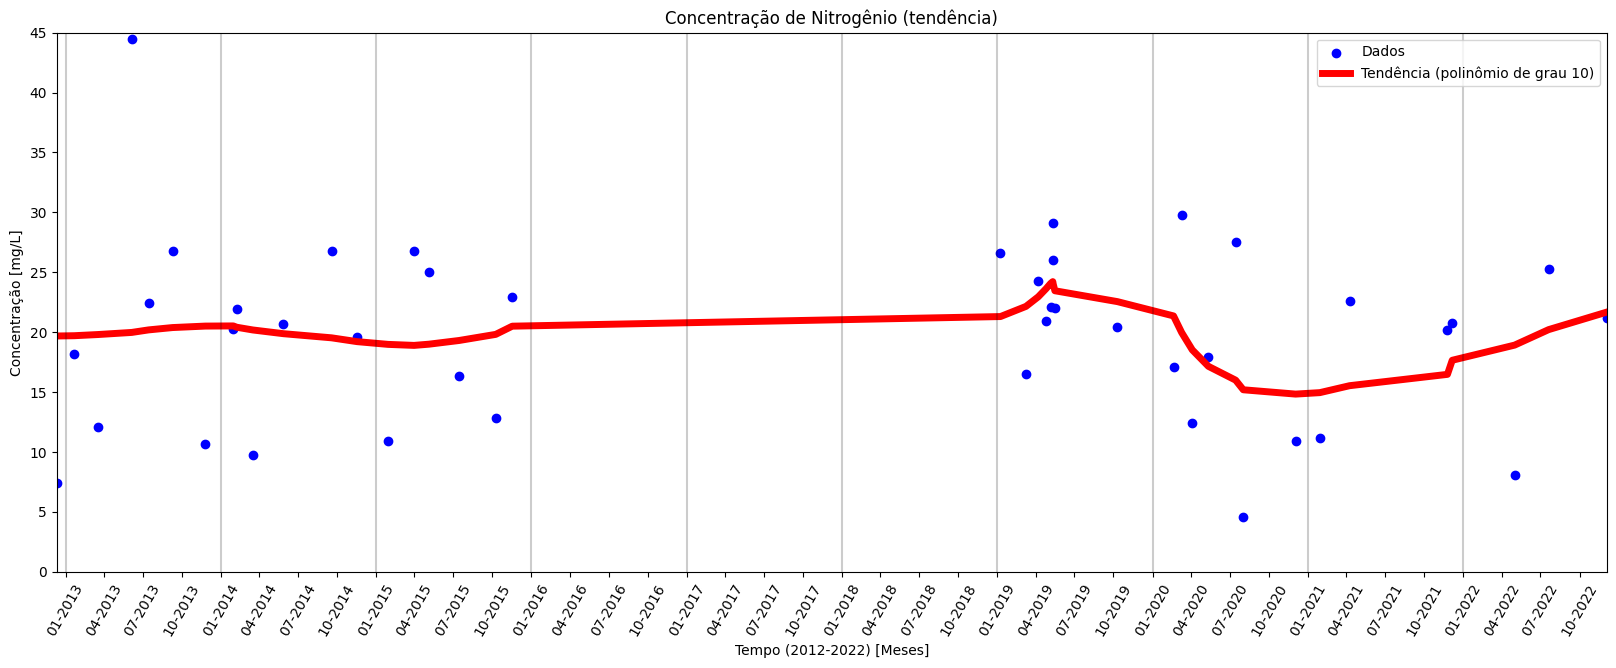

In [73]:
fit_polynomial_plot('Concentração de Nitrogênio (tendência)', df_2012_2022_nitrogenio['datetime'], df_2012_2022_nitrogenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', [0, 45])

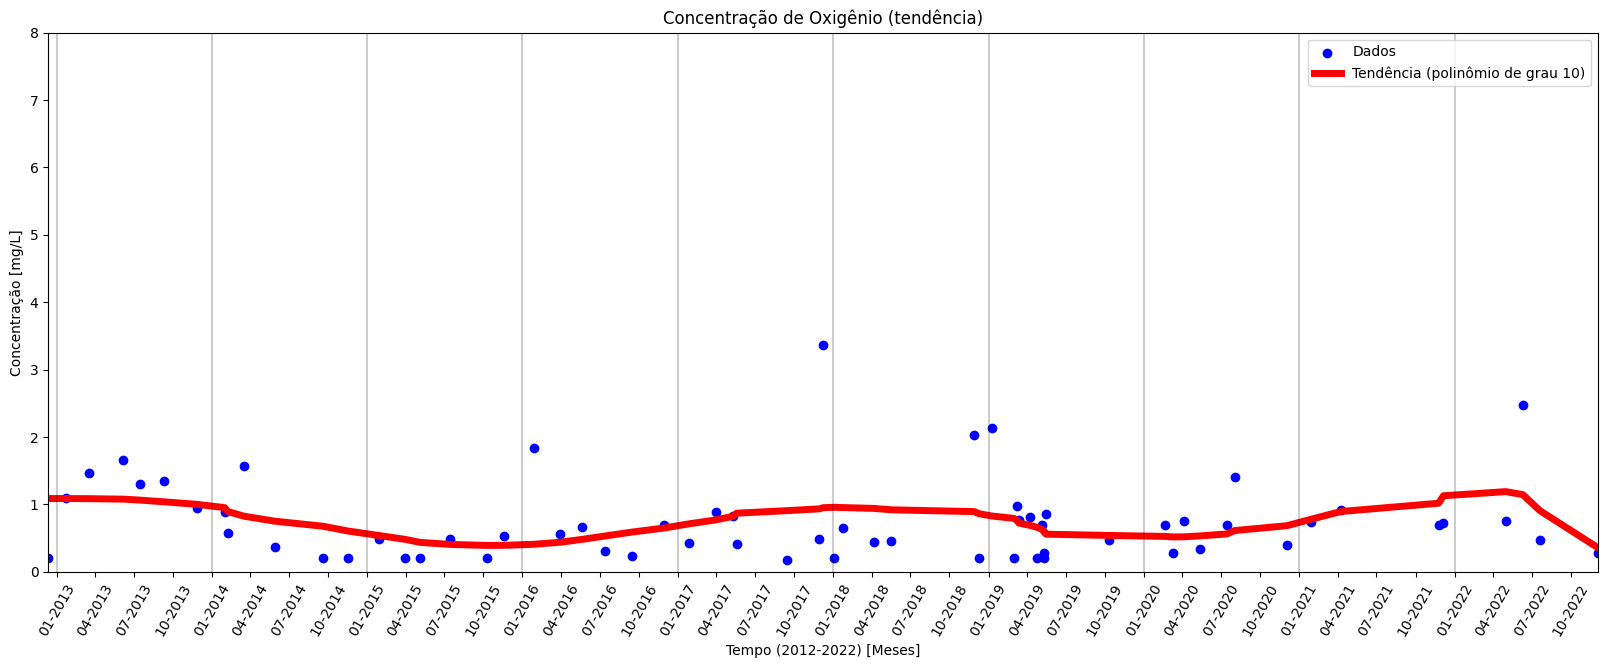

In [74]:
fit_polynomial_plot('Concentração de Oxigênio (tendência)', df_2012_2022_oxigenio['datetime'], df_2012_2022_oxigenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', [0, 8])

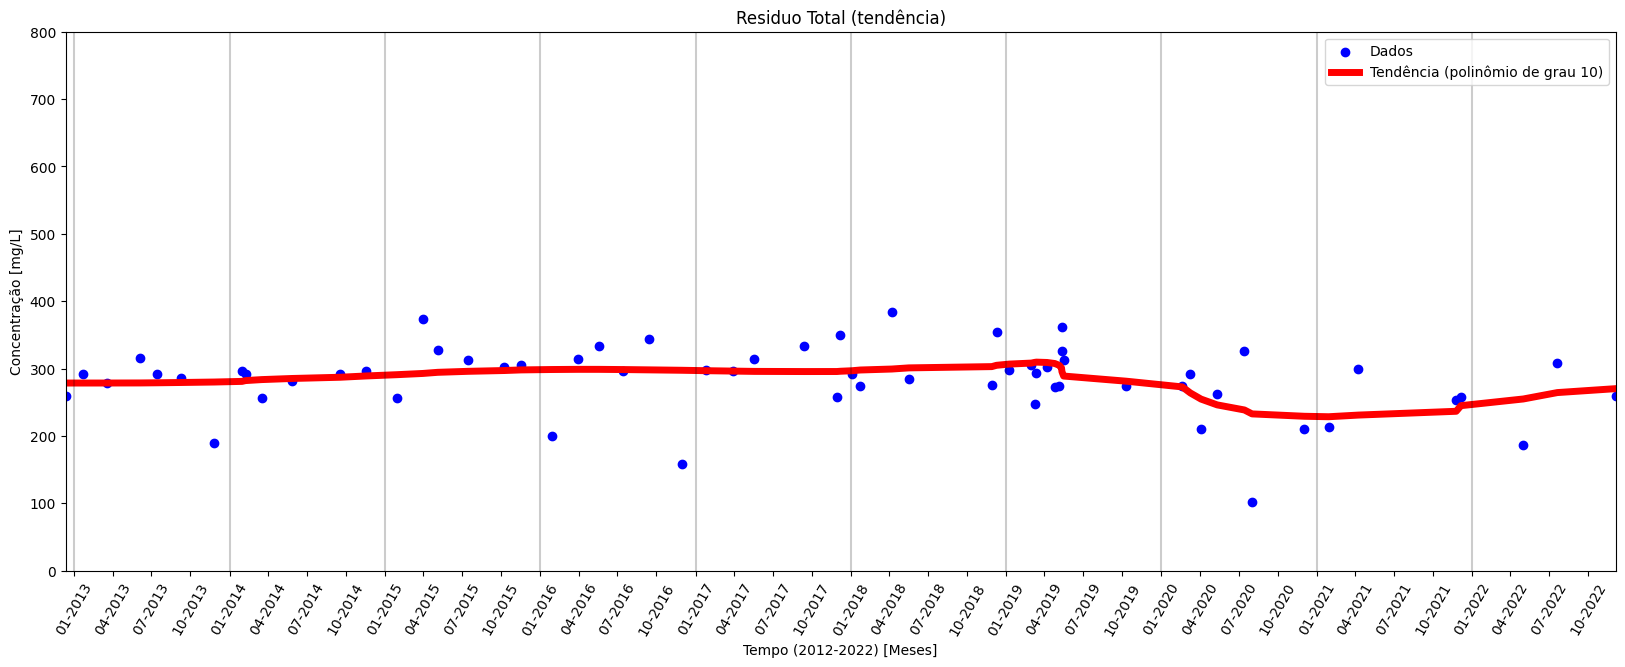

In [75]:
fit_polynomial_plot('Residuo Total (tendência)', df_2012_2022_solidos['datetime'], df_2012_2022_solidos['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]', [0, 800])

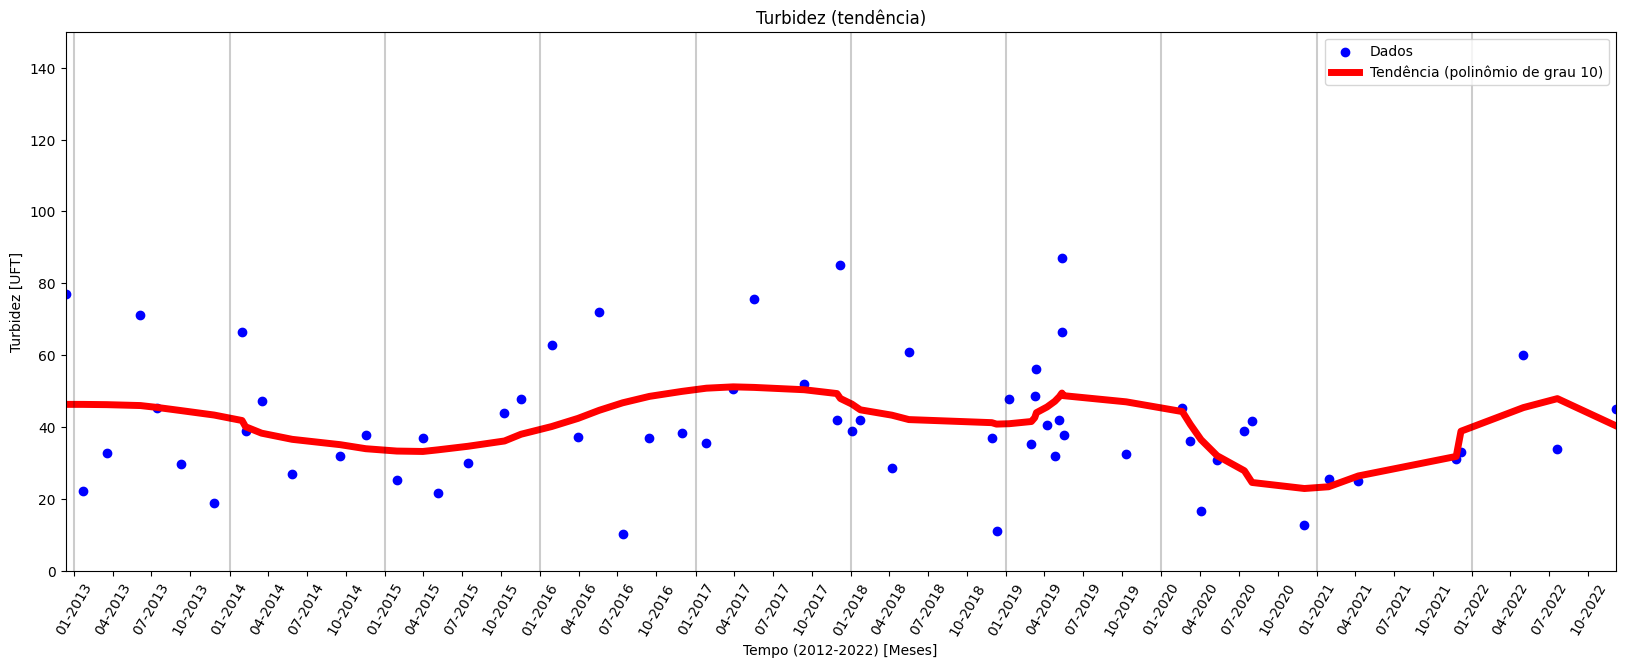

In [76]:
fit_polynomial_plot('Turbidez (tendência)', df_2012_2022_turbidez['datetime'], df_2012_2022_turbidez['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Turbidez [UFT]', [0, 150])